In [0]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.model_selection import train_test_split



In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the dataset and randomise it so the split into train and test is evenly balanced:

In [30]:
df=pd.read_csv("/content/drive/My Drive/final_dataset.csv")
df=df.drop(['Unnamed: 0'],axis=1)
df

,Category,date,high,low,open,close,volume,adj_close,comp,wr,moving_avg,RSI,stoch
0,Transportation,01-07-2015,312.700012,306.500000,308.799988,311.299988,2854143,303.809296,Adani Ports & SEZ,-22.580994,311.299988,0.000000,77.419006
1,Transportation,02-07-2015,319.000000,311.899994,312.450012,316.049988,8669541,308.445007,Adani Ports & SEZ,-23.600098,313.674988,0.000000,76.399902
2,Transportation,03-07-2015,325.750000,319.000000,319.950012,320.799988,5189498,313.080688,Adani Ports & SEZ,-25.714349,316.049988,0.000000,74.285651
3,Transportation,06-07-2015,321.100006,316.250000,316.950012,320.100006,2853145,312.397553,Adani Ports & SEZ,-29.350618,317.062492,0.000000,70.649382
4,Transportation,07-07-2015,334.700012,321.600006,321.799988,333.049988,7877450,325.035919,Adani Ports & SEZ,-5.851148,320.259991,93.137435,94.148852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58695,NaN,01-04-2020,126.750000,120.000000,124.000000,120.900002,6571413,120.900002,ZEEL,-91.958041,141.136667,30.112364,8.263475
58696,NaN,03-04-2020,125.949997,119.050003,123.000000,124.349998,7887911,124.349998,ZEEL,-87.604792,136.716668,31.874355,14.577463
58697,NaN,07-04-2020,143.000000,126.650002,129.000000,140.899994,11487040,140.899994,ZEEL,-62.112685,133.923334,39.689528,37.887315
58698,NaN,08-04-2020,148.149994,135.250000,138.000000,143.149994,10046602,143.149994,ZEEL,-58.943671,132.376666,40.680751,41.056329


In [0]:
df['date'] = pd.to_datetime(df.date,format='%d-%m-%Y')

In [32]:
df=df[df['comp']=='Adani Ports & SEZ']
df

,Category,date,high,low,open,close,volume,adj_close,comp,wr,moving_avg,RSI,stoch
0,Transportation,2015-07-01,312.700012,306.500000,308.799988,311.299988,2854143,303.809296,Adani Ports & SEZ,-22.580994,311.299988,0.000000,77.419006
1,Transportation,2015-07-02,319.000000,311.899994,312.450012,316.049988,8669541,308.445007,Adani Ports & SEZ,-23.600098,313.674988,0.000000,76.399902
2,Transportation,2015-07-03,325.750000,319.000000,319.950012,320.799988,5189498,313.080688,Adani Ports & SEZ,-25.714349,316.049988,0.000000,74.285651
3,Transportation,2015-07-06,321.100006,316.250000,316.950012,320.100006,2853145,312.397553,Adani Ports & SEZ,-29.350618,317.062492,0.000000,70.649382
4,Transportation,2015-07-07,334.700012,321.600006,321.799988,333.049988,7877450,325.035919,Adani Ports & SEZ,-5.851148,320.259991,93.137435,94.148852
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,Transportation,2020-04-01,247.800003,235.050003,246.050003,244.800003,4034211,244.800003,Adani Ports & SEZ,-57.735080,255.099999,33.572445,42.784031
1170,Transportation,2020-04-03,252.800003,238.899994,246.000000,244.800003,7210403,244.800003,Adani Ports & SEZ,-57.215969,252.243333,33.572445,52.022402
1171,Transportation,2020-04-07,255.850006,245.600006,254.199997,248.100006,7360798,248.100006,Adani Ports & SEZ,-43.870563,249.266667,35.331183,56.129437
1172,Transportation,2020-04-08,255.850006,242.750000,248.000000,250.850006,6897792,250.850006,Adani Ports & SEZ,-40.448037,248.563334,36.824605,68.357152


In [33]:
df.shape

(1174, 13)

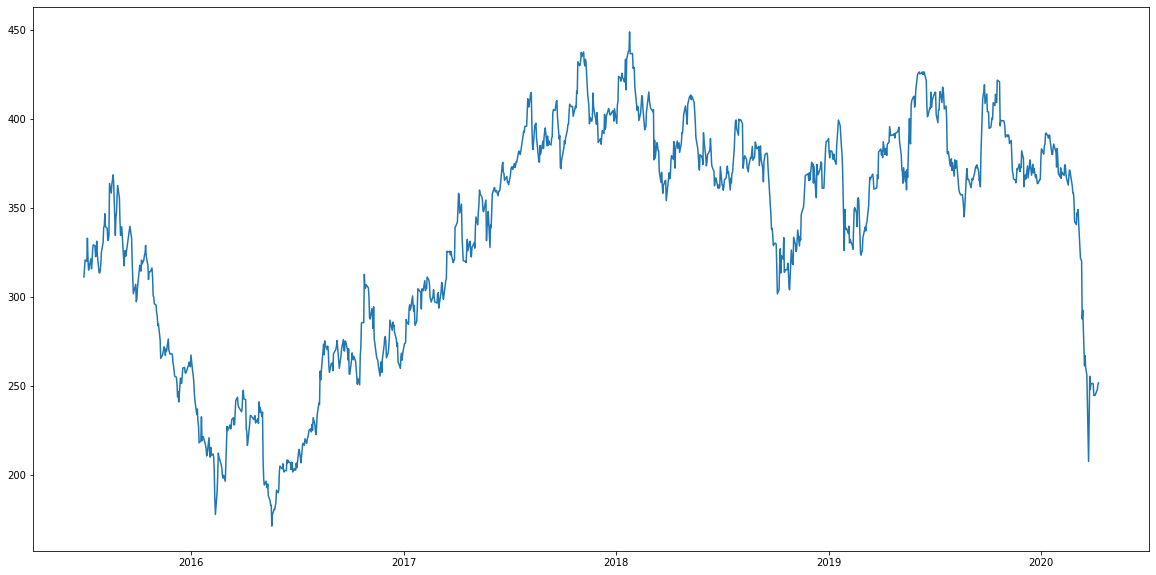

In [34]:
#plot
plt.plot(df['date'],np.asarray(df['close']), label='Close Price history')

## 1) Moving Average

‘Average’ is easily one of the most common things we use in our day-to-day lives. For instance, calculating the average marks to determine overall performance, or finding the average temperature of the past few days to get an idea about today’s temperature – these all are routine tasks we do on a regular basis. So this is a good starting point to use on our dataset for making predictions.

The predicted closing price for each day will be the average of a set of previously observed values. Instead of using the simple average, we will be using the moving average technique which uses the latest set of values for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set.

In [0]:
X=df[['date','close']]

Taking a training set of 700 and predicting the rest:

In [0]:
preds=np.array(X['close'][:700])
for i in range(700,X.shape[0]):
    a=np.mean(preds[i-700:])
    preds=np.append(preds,a)

In [37]:
preds.shape

(1174,)

In [38]:
np.square((X['close'][700:])-preds[700:]).shape

(474,)

In [39]:
rms=np.sqrt(np.mean(np.square((X['close'][700:])-preds[700:])))
rms

54.233810838407976

Just checking the RMSE does not help us in understanding how the model performed. Let’s visualize this to get a more intuitive understanding. So here is a plot of the predicted values along with the actual values.

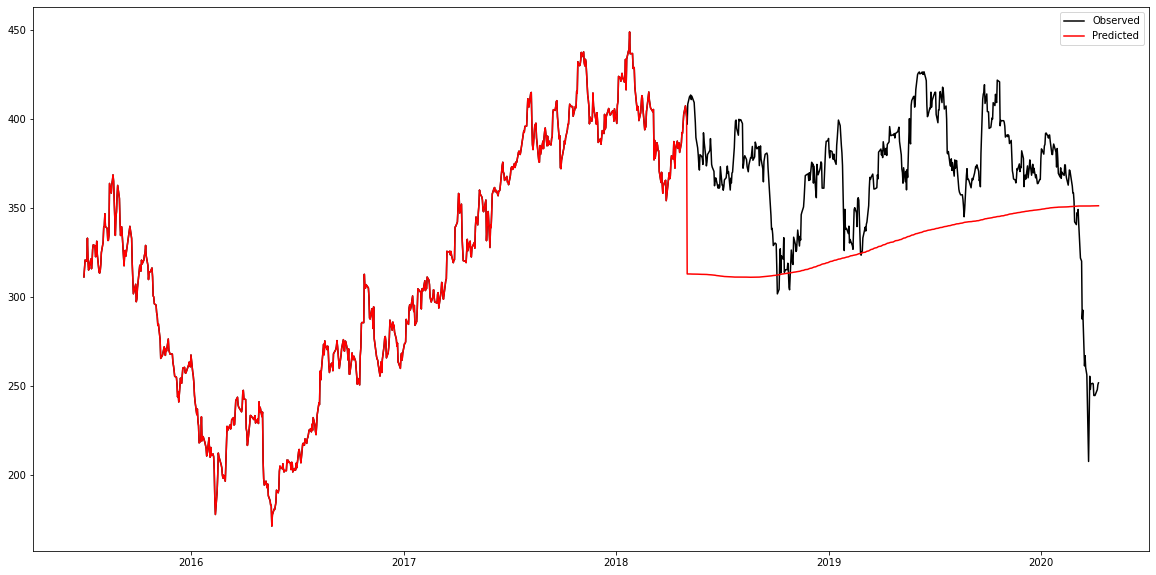

In [40]:
plt.plot(df['date'],np.asarray(X['close']),c='k',label='Observed')
plt.plot(df['date'],preds,c='r',label='Predicted')
plt.legend()
plt.show()

# 2) Linear Regression

The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.

The equation for linear regression can be written as:

Here, x1, x2,….xn represent the independent variables while the coefficients θ1, θ2, …. θn  represent the weights. You can refer to the following article to study linear regression in more detail:

A comprehensive beginners guide for Linear, Ridge and Lasso Regression.
For our problem statement, we do not have a set of independent variables. We have only the dates instead. Let us use the date column to extract features like – day, month, year,  mon/fri etc. and then fit a linear regression model.

In [0]:
X=df[['wr',	'moving_avg'	,'RSI',	'stoch']]
y=df['adj_close']
y=np.asarray(y)

In [0]:
X_train=X[:int(0.8*len(X))]
X_train_date=df['date'][:int(0.8*len(X))]
X_test=X[int(0.8*len(X)):]
X_test_date=df['date'][int(0.8*len(X)):]
y_train=y[:int(0.8*len(y))]
y_test=y[int(0.8*len(y)):]

In [0]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test))

In [44]:
n=4
m=len(X_train)
y = np.array(y_train)
y = np.reshape(y_train,(y_train.shape[0],1))
t = np.ones((m,1))
x = np.hstack((t,X_train))
w=np.zeros(n+1)
w= np.array(w)
w = np.reshape(w,(1,w.shape[0]))
print(y.shape)
print(w.shape)
print(x.shape)

(939, 1)
(1, 5)
(939, 5)


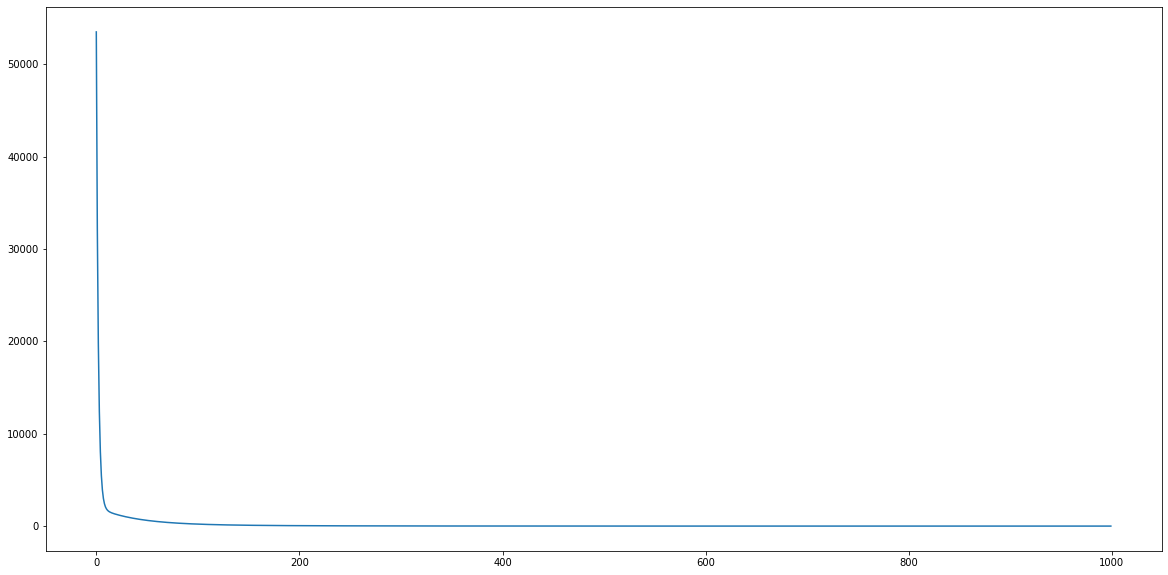

In [45]:
alpha=0.1
t=1000
temp = np.zeros((n+1,1))
cost_log = []
for k in range(t):
  hwx = np.dot(x,w.T)
  for i in range(n+1):
      temp[i] = w[0,i] - alpha*(1./m)*(np.sum( (hwx-y)*x[:,i:i+1]))
  for i in range(n+1):
      w[0,i] = temp[i]
  J = (1/(2*m))*np.sum(np.square(hwx-y))
  cost_log = np.append(cost_log, J)
plt.plot(np.arange(t), cost_log)

We know the Linear regression model is being trained correctly because the error constantly reduces over the iterations. 

In [0]:
n=2
m=len(X_test)
y = np.array(y_test)
y = np.reshape(y_test,(y_test.shape[0],1))
t = np.ones((m,1))
x = np.hstack((t,X_test))


In [47]:
hwx=np.dot(x,w.T)
J = np.sqrt(np.mean(np.square(hwx-y)))
J

17.5571221692375

In [48]:
hwx.shape

(235, 1)

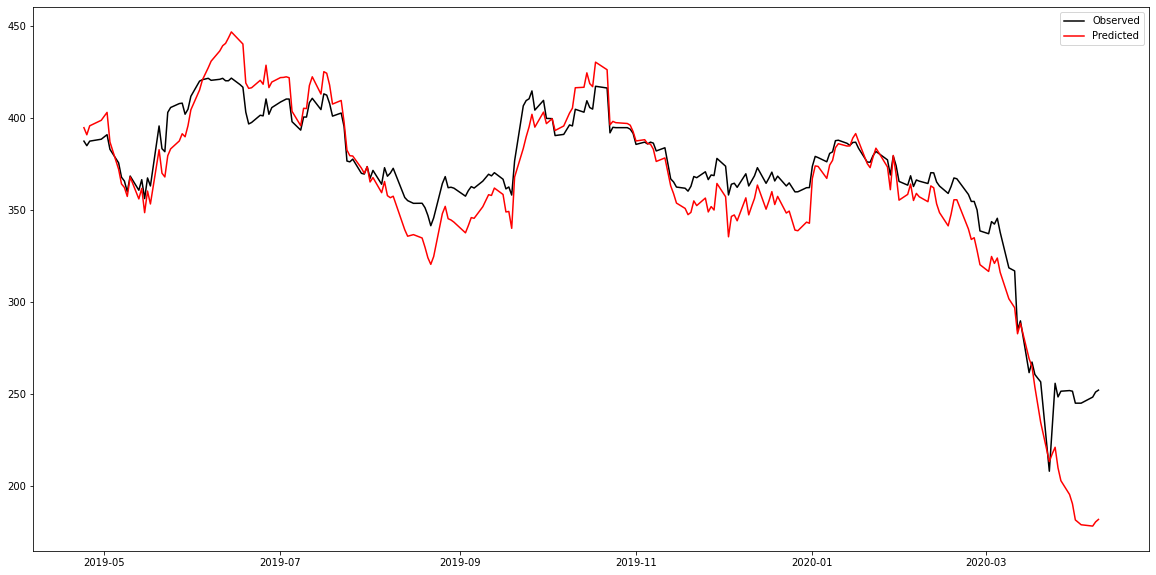

In [49]:
plt.plot(X_test_date,y_test,c='k',label='Observed')
plt.plot(X_test_date,hwx,c='r',label='Predicted')
plt.legend()
plt.show()

# KNN

In [0]:
X=df[['wr',	'moving_avg'	,'RSI',	'stoch']]
y=df['adj_close']
y=np.asarray(y)

In [0]:
X_train=X[:int(0.8*len(X))]
X_train_date=df['date'][:int(0.8*len(X))]
X_test=X[int(0.8*len(X)):]
X_test_date=df['date'][int(0.8*len(X)):]
y_train=y[:int(0.8*len(y))]
y_test=y[int(0.8*len(y)):]

In [0]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test))

Taking k=20:-

In [53]:
# taking k as 20
k=20
err=[]
pred=[]
for i in range(len(X_test)):
    final=defaultdict(int)
    sor=[]
    for j in range(len(X_train)):
      dist=np.sum(np.square(np.asarray(X_test)[i]-np.asarray(X_train)[j]))  #take euclidean distance of test sample from each training sample
      sor.append((dist,j))
    knn=sorted(sor) #sort in ascending order
    # print(knn)
    for l in range(k):
      final[np.asarray(y_train)[knn[l][1]]]+=1 #taking the vote of each label from the k closest training samples
    cls=max(final,key=final.get) 
    pred.append(cls) 
    err.append(abs(cls-y_test[i]))

print("RMS error: ",np.sqrt(np.mean(np.square(err))))

RMS error:  19.55873119831114


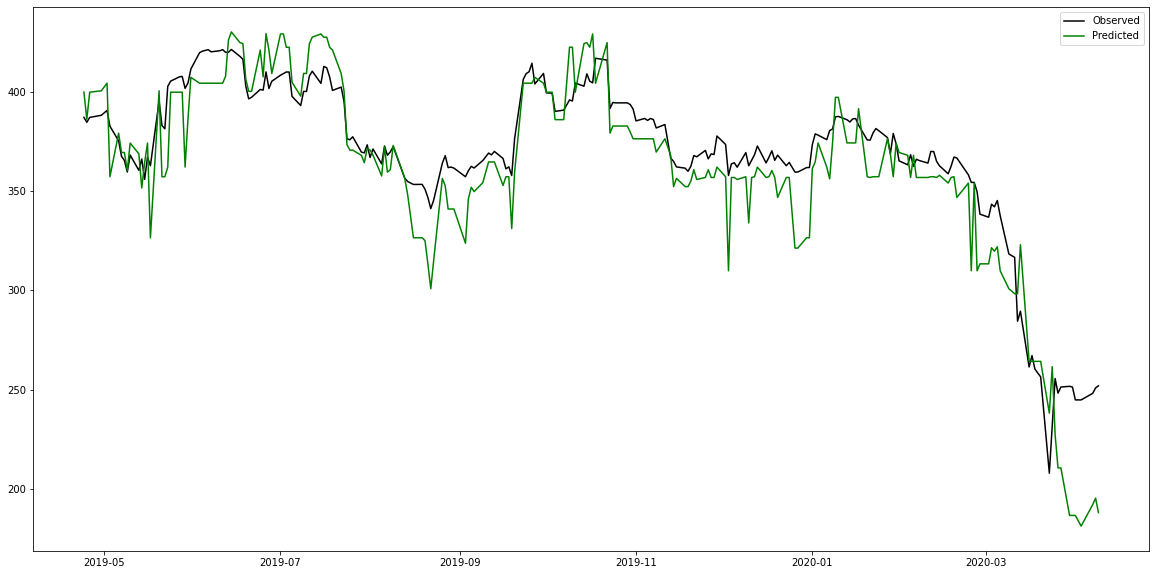

In [54]:
plt.plot(X_test_date,y_test,c='k',label='Observed')
plt.plot(X_test_date,pred,c='g',label='Predicted')
plt.legend()
plt.show()